---

### 1.Problem Definition

Predict the Global_Sale
1. Analyse the importance of features that can be of help in increasing the global sales

---

### 2.Dataset Preview

In [123]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [124]:
videoGames=pd.read_csv("Video_Games.csv")
videoGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


---

### 3.Data Cleaning / Preparation

In [126]:
videoGamesSelected=pd.DataFrame(videoGames[['Platform','Genre','Publisher','Critic_Score','Global_Sales','User_Score','Rating']])
videoGamesSelected = videoGamesSelected[videoGamesSelected.User_Score != "tbd"]
videoGamesSelected["User_Score"] = pd.to_numeric(videoGamesSelected["User_Score"])
videoGamesSelected

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E
1,NES,Platform,Nintendo,NaN,40.24,NaN,NaN
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E
4,GB,Role-Playing,Nintendo,NaN,31.37,NaN,NaN
...,...,...,...,...,...,...,...
16714,PS3,Action,Tecmo Koei,NaN,0.01,NaN,NaN
16715,X360,Sports,Codemasters,NaN,0.01,NaN,NaN
16716,PSV,Adventure,Idea Factory,NaN,0.01,NaN,NaN
16717,GBA,Platform,Wanadoo,NaN,0.01,NaN,NaN


In [127]:
for i in videoGamesSelected:
    print(i, videoGamesSelected[i].isnull().sum())

Platform 0
Genre 2
Publisher 52
Critic_Score 7239
Global_Sales 0
User_Score 6704
Rating 6719


In [128]:
videoGamesSelectedCleaned=pd.DataFrame(videoGamesSelected[~videoGamesSelected
                                                          ['Critic_Score'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Publisher'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Genre'].isnull() &
                                                          ~videoGamesSelected
                                                          ['User_Score'].isnull() &
                                                          ~videoGamesSelected
                                                          ['Rating'].isnull()])
videoGamesSelectedCleaned

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E
6,DS,Platform,Nintendo,89.0,29.80,8.5,E
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E
...,...,...,...,...,...,...,...
16667,GBA,Action,NewKidCo,46.0,0.01,2.4,E
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M
16700,PC,Shooter,Destineer,61.0,0.01,5.8,T


In [129]:
for i in videoGamesSelectedCleaned:
    print(i, videoGamesSelectedCleaned[i].isnull().sum())

Platform 0
Genre 0
Publisher 0
Critic_Score 0
Global_Sales 0
User_Score 0
Rating 0


---

### 4.Data Analysis / Visualisation

## For Rating

In [130]:
videoGamesSelectedCleaned['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

## For Genre

In [131]:
videoGamesSelectedCleaned['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

## For Publisher

In [132]:
videoGamesSelectedCleaned['Publisher'].nunique()
videoGamesSelectedCleaned['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Unknown', 'Black Label G

In [133]:
videoGamesPublisher=videoGamesSelectedCleaned.groupby('Publisher')
videoGamesPublisher=videoGamesPublisher.filter(lambda x:len(x)>=50)
videoGamesPublisher

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E
6,DS,Platform,Nintendo,89.0,29.80,8.5,E
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E
...,...,...,...,...,...,...,...
16644,PC,Strategy,Codemasters,51.0,0.01,3.8,E10+
16656,WiiU,Action,Nintendo,81.0,0.01,8.5,E
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M


<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

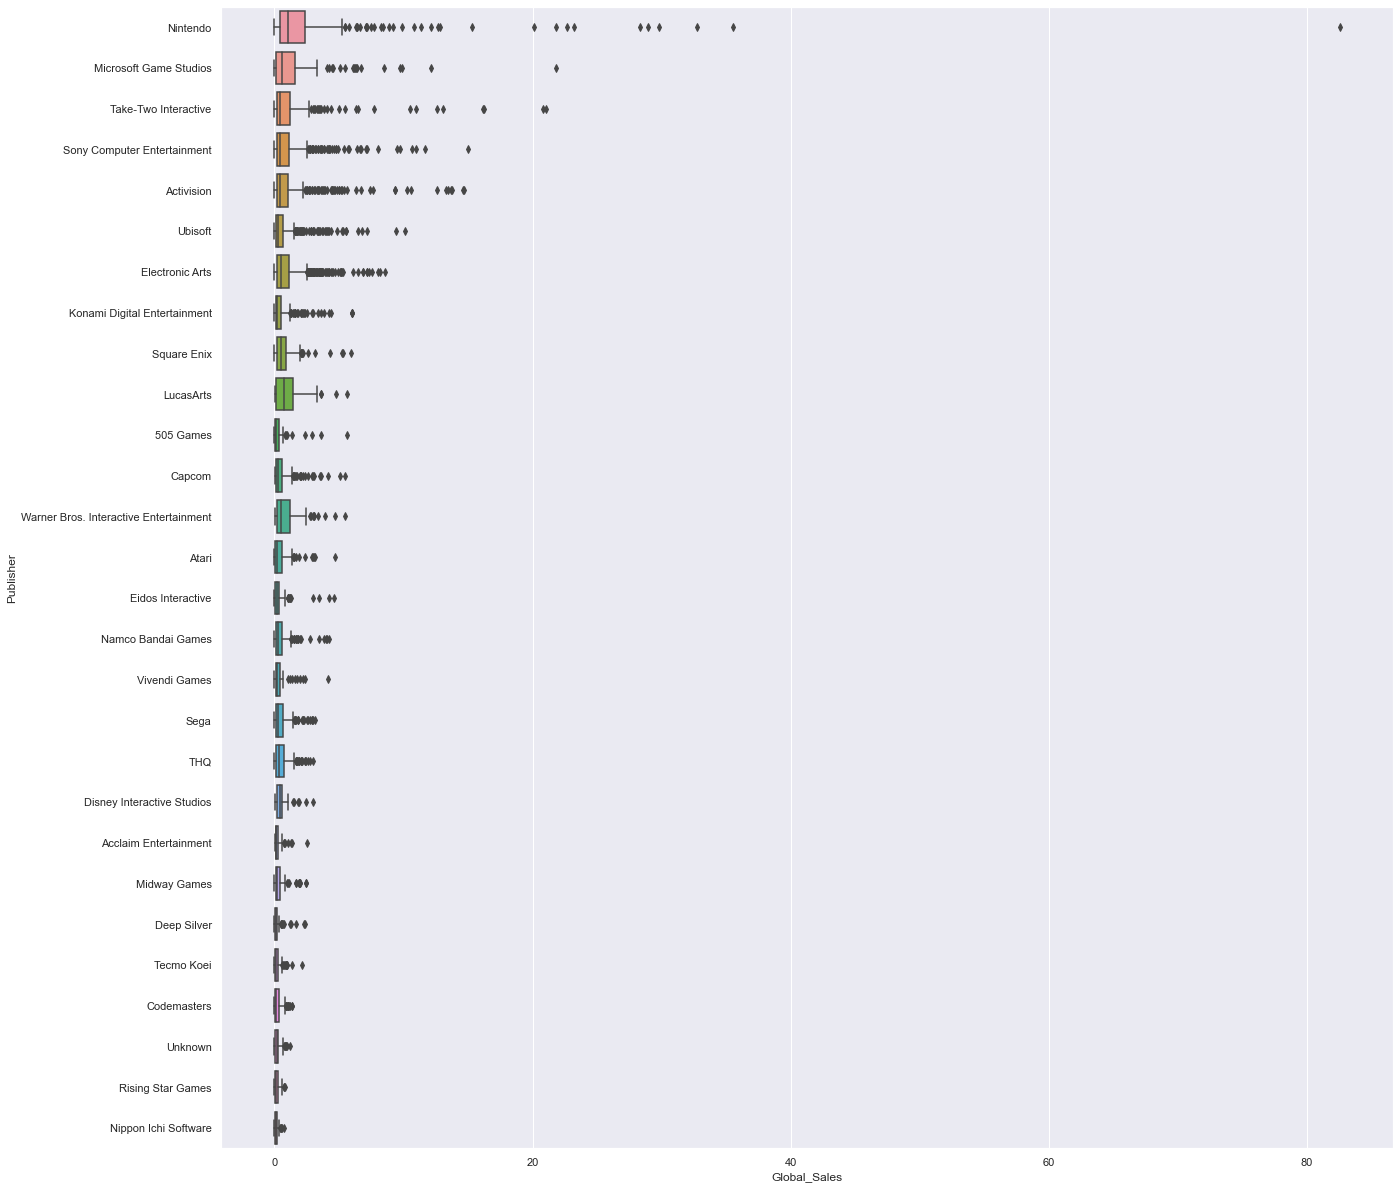

In [134]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Publisher', orient='h', data = videoGamesPublisher)

In [135]:
def right(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q3+IQR
    
def left(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q1-IQR

## For companies with over 50 sales

In [136]:
def removeOutliers(df,predictor,response):
    videoGamesPublisherGrouped=df.groupby(predictor)#['Global_Sales']
    whiskers=videoGamesPublisherGrouped[response].apply(lambda x: [left(x),right(x)]).apply(pd.Series)
    whiskers.columns=['left','right']
    merge=pd.merge(df,whiskers,on=predictor)
    videoGamesPublisherGrouped=merge[(merge[response]<=(merge['right'])) &
                                     (merge[response]>=(merge['left']))]
    f=plt.figure(figsize=(21,21))
    sb.boxplot(x=response, y = predictor, orient='h', data = videoGamesPublisherGrouped, 
          order= videoGamesPublisherGrouped.groupby(predictor)[response].median().sort_values(ascending=False).index)

## not complete but I think this can only be applied to numeric data i.e. critic score
def checkSkew(df,predictor):
  groupedDf=df.groupby(predictor)
  uniquePredictors=df[predictor].unique()
  for i in uniquePredictors:
    print(i, groupedDf[i].skew())

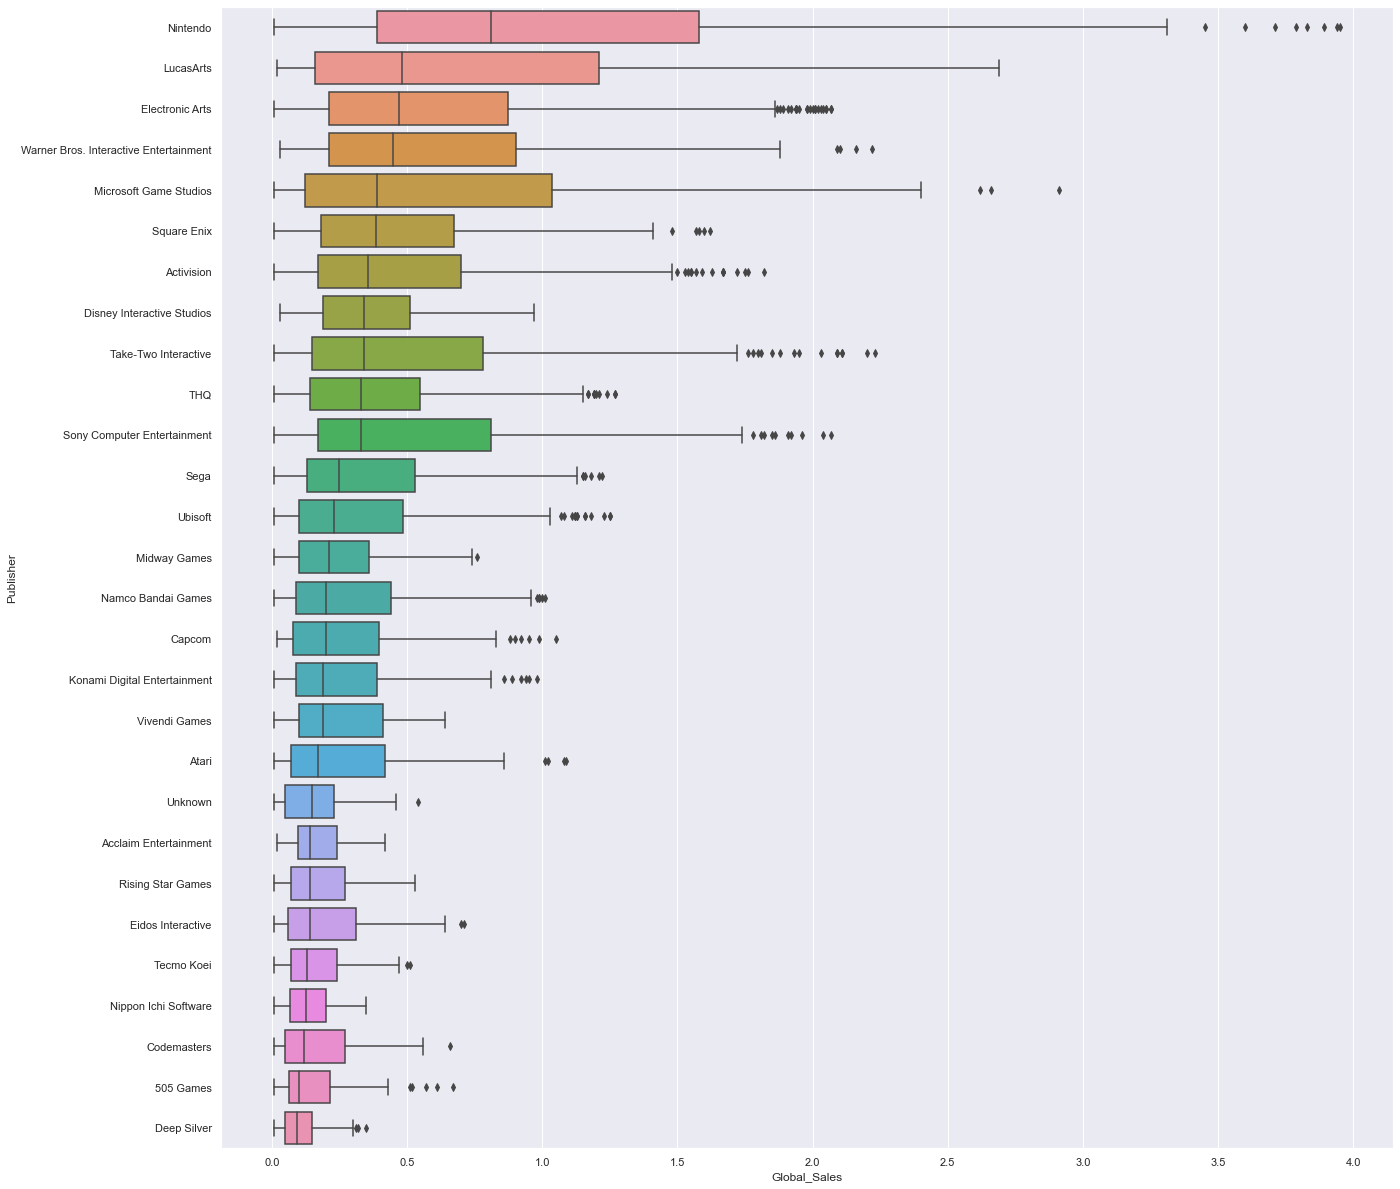

In [137]:
removeOutliers(videoGamesPublisher,'Publisher','Global_Sales')

## reasonable distinctness?

## For Genre

In [138]:
videoGamesSelectedCleaned['Genre'].nunique()

12

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

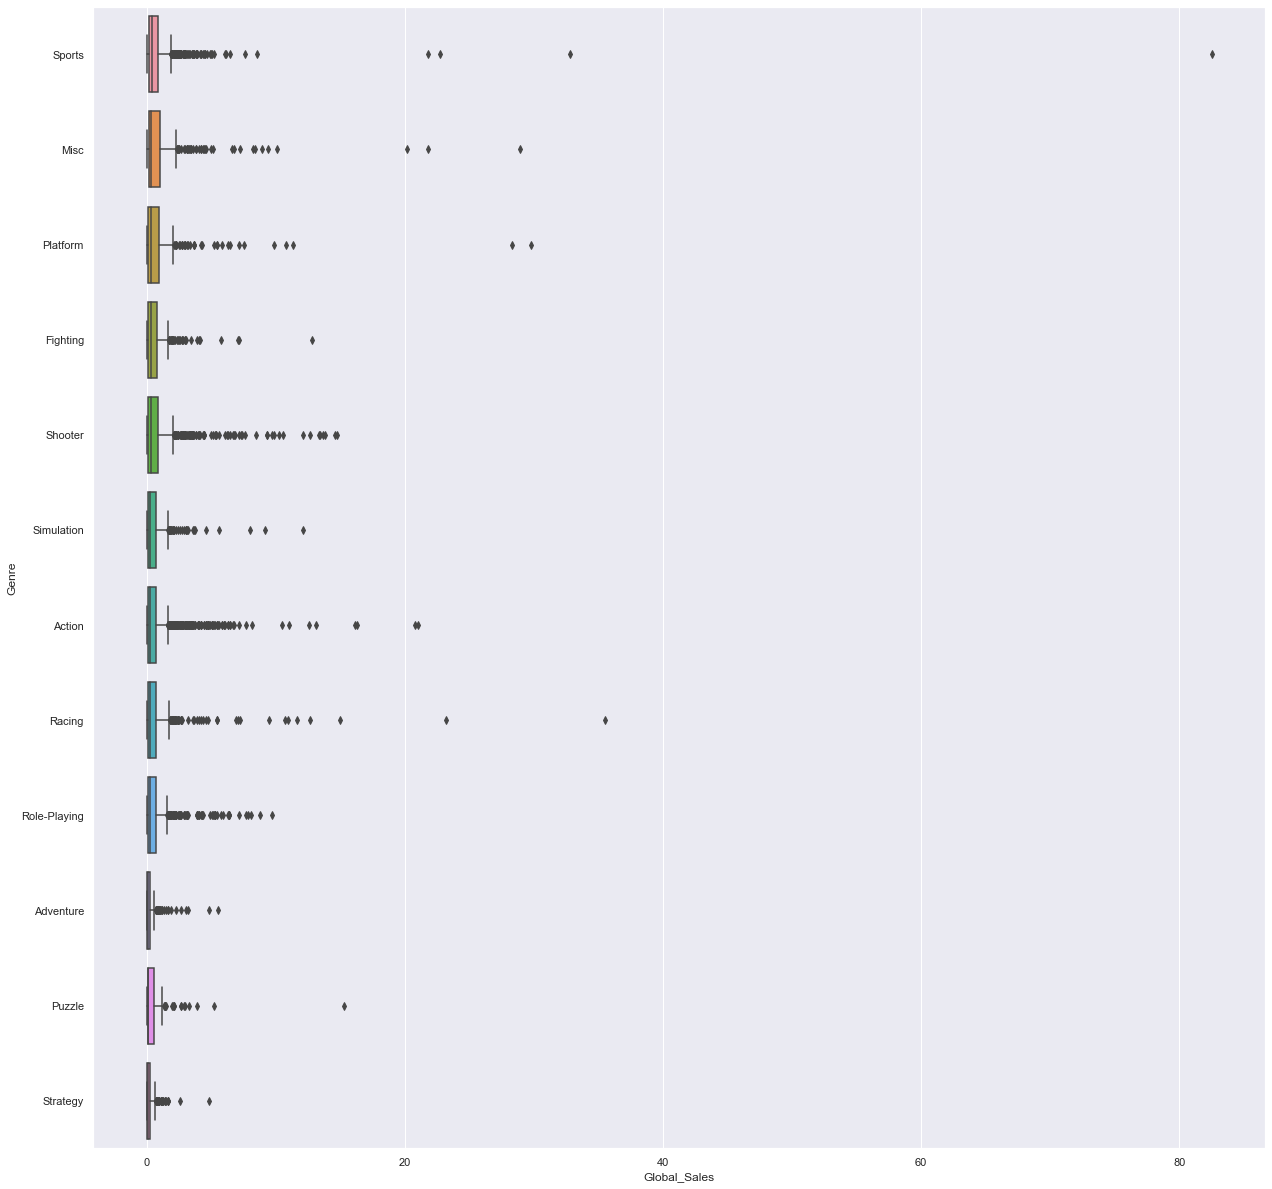

In [139]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Genre', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).index)


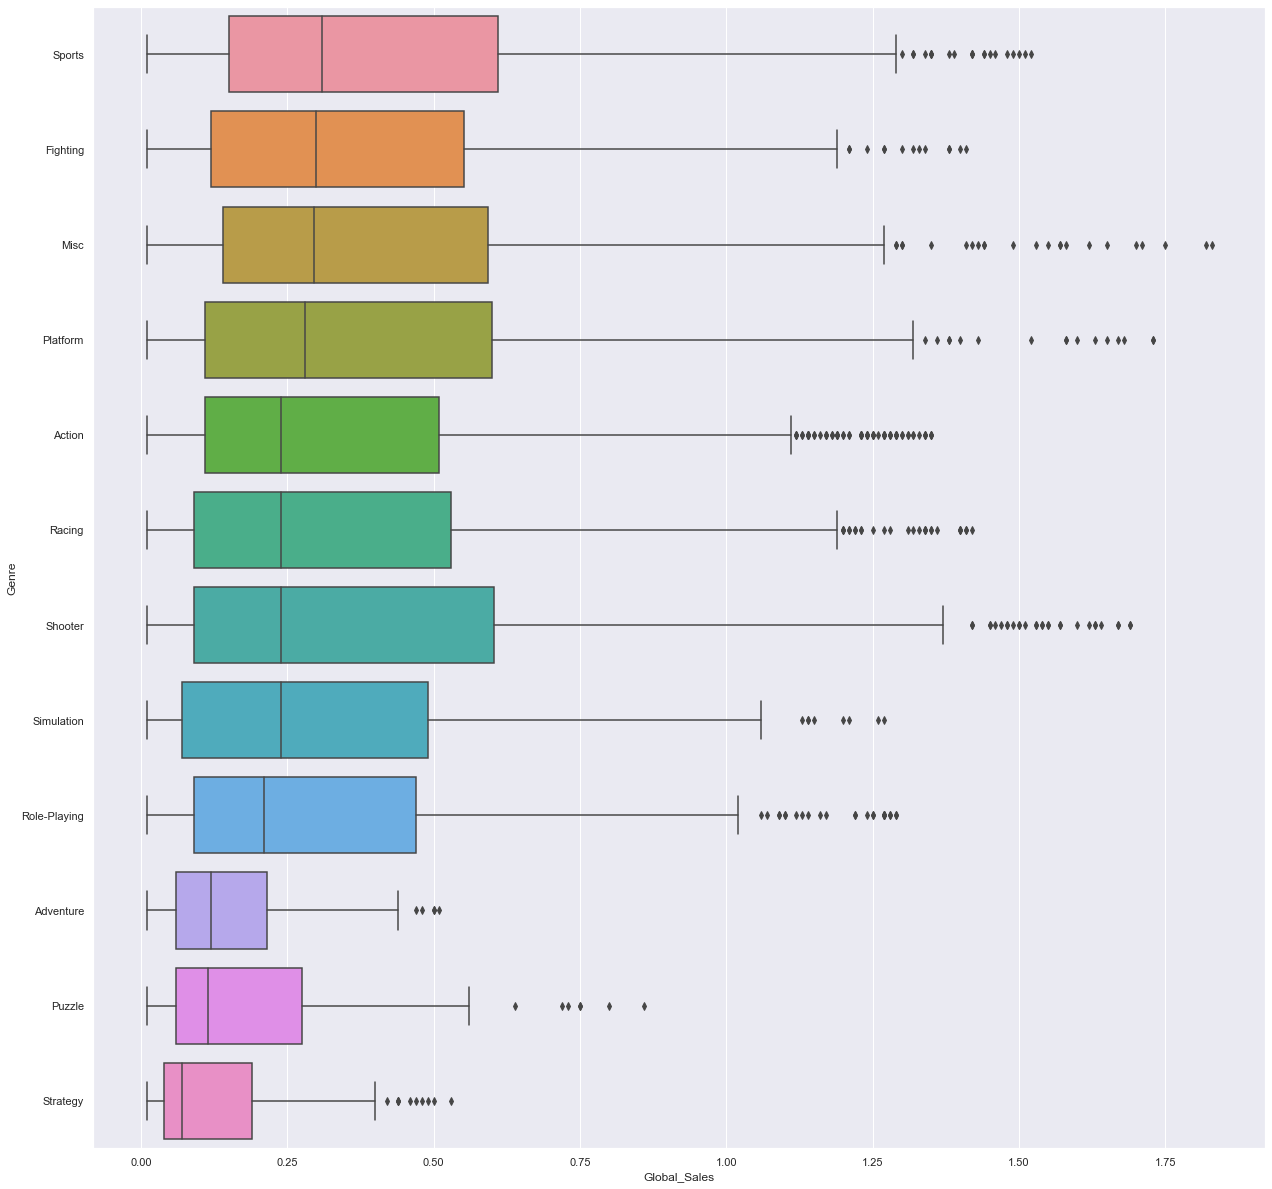

In [140]:
removeOutliers(videoGamesSelectedCleaned,'Genre','Global_Sales')

## reasonable distinctness?

## For platform

In [141]:
videoGamesSelectedCleaned['Platform'].nunique()

17

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

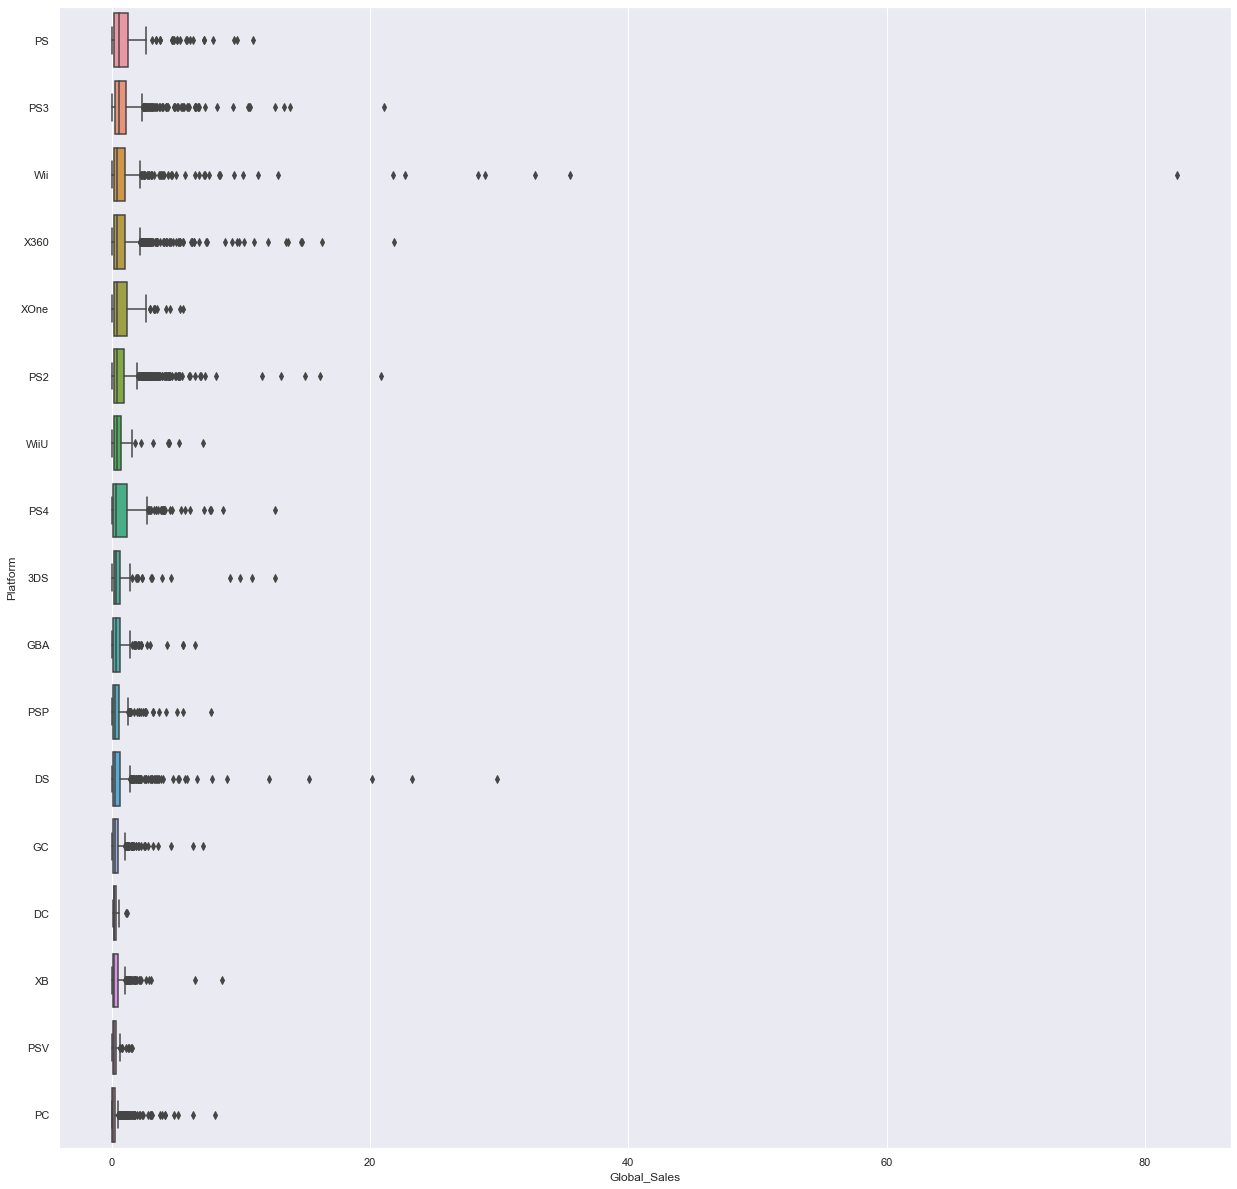

In [142]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Platform', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False).index)


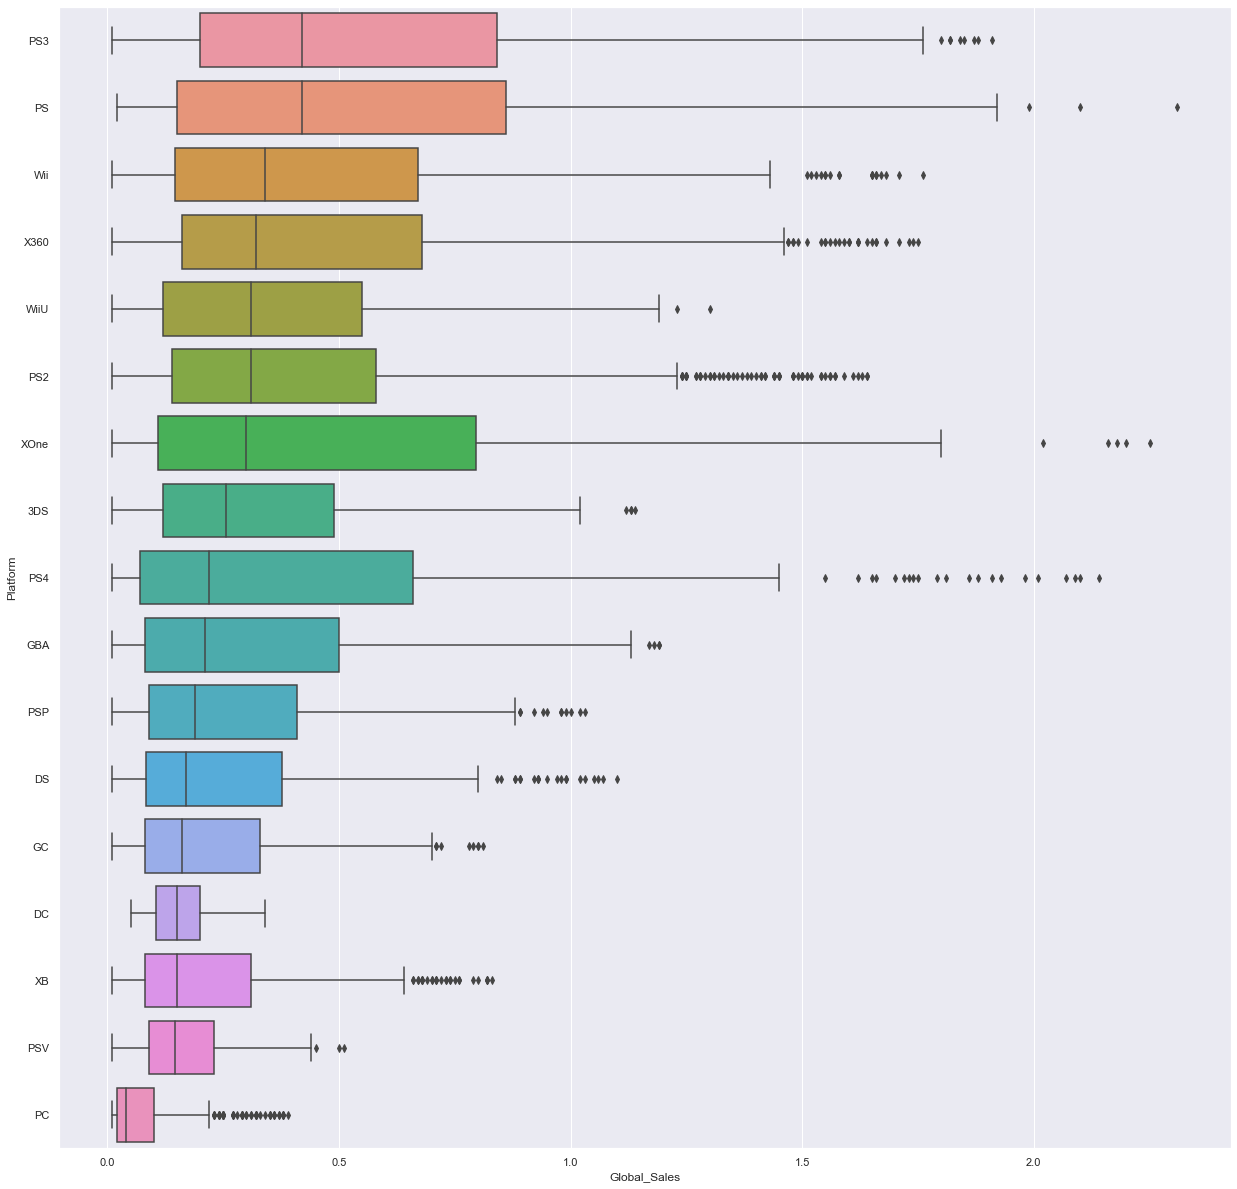

In [143]:
removeOutliers(videoGamesSelectedCleaned,'Platform','Global_Sales')

## somewhat promising

## For critic score

In [144]:
scoreSales=videoGamesSelectedCleaned[['Critic_Score','Global_Sales']]

In [145]:
scoreSales.corr()

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.237459
Global_Sales,0.237459,1.000000


<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>

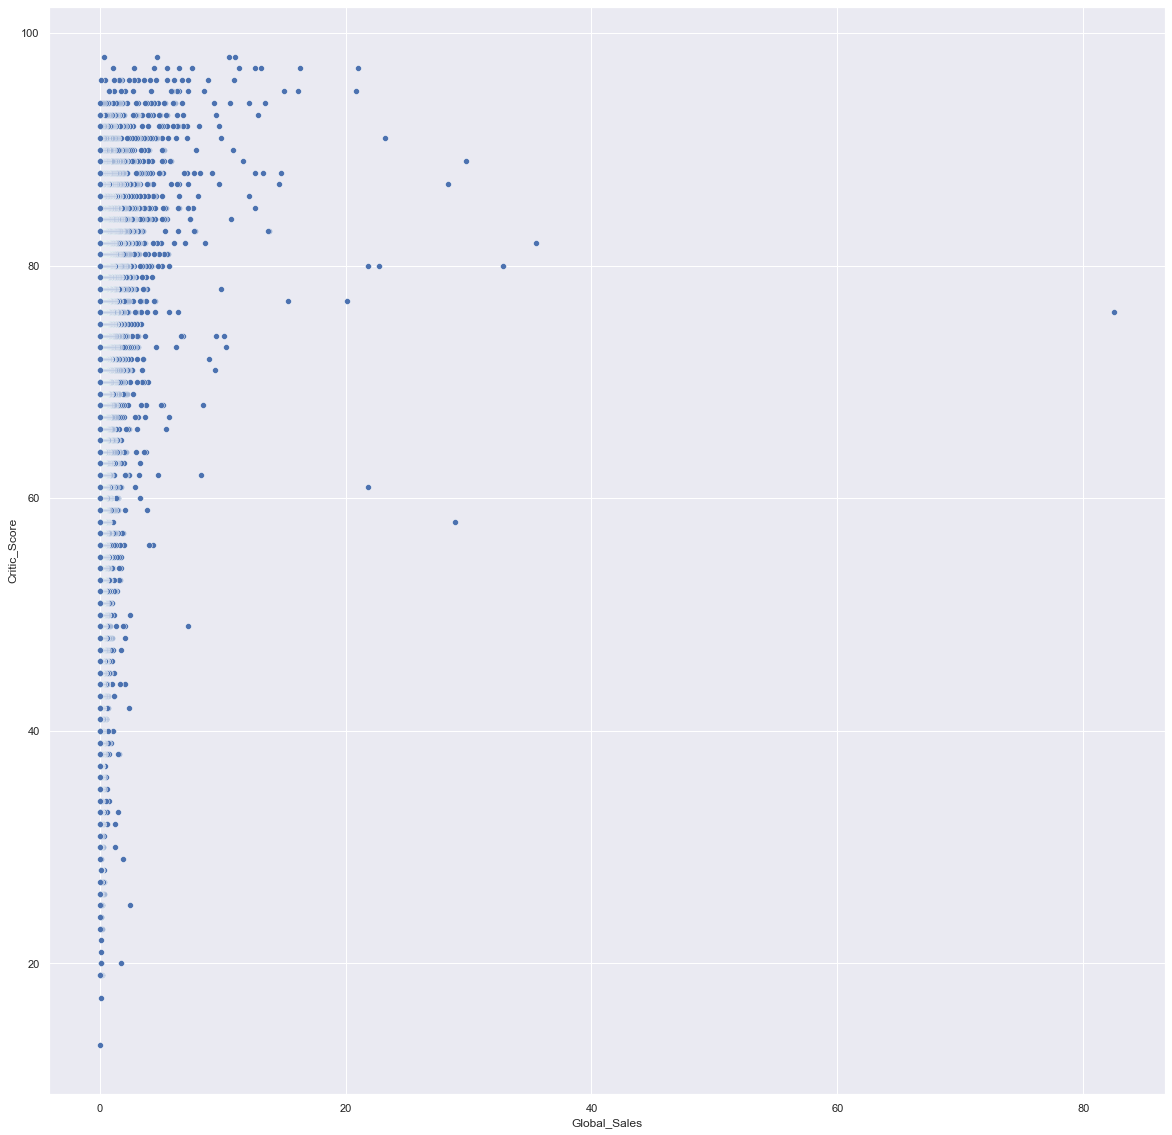

In [146]:
plt.figure(figsize=(20, 20))
sb.scatterplot(videoGamesSelectedCleaned, y = "Critic_Score", x = "Global_Sales")

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

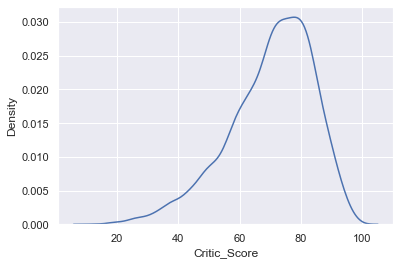

In [147]:
sb.kdeplot(data=scoreSales['Critic_Score'])

## got .25 corr not great


# userscore corr

In [148]:
scoreSales=videoGamesSelectedCleaned[['User_Score','Global_Sales']]
scoreSales.corr()


,User_Score,Global_Sales
User_Score,1.000000,0.088561
Global_Sales,0.088561,1.000000


# predict global sales by critic score



In [149]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()



train = videoGamesSelectedCleaned.sample(frac=.8)
test = videoGamesSelectedCleaned.drop(train.index)


cs_train = pd.DataFrame(train['Critic_Score'])
cs_test = pd.DataFrame(test['Critic_Score'])
gs_train = pd.DataFrame(train['Global_Sales'])
gs_test = pd.DataFrame(test['Global_Sales'])


Intercept of Regression 	: b =  [-1.54061682]
Coefficients of Regression 	: a =  [[0.03294127]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0515524978861257
Mean Squared Error (MSE) 	: 3.912867583758281

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08825500600065783
Mean Squared Error (MSE) 	: 2.275870047731901



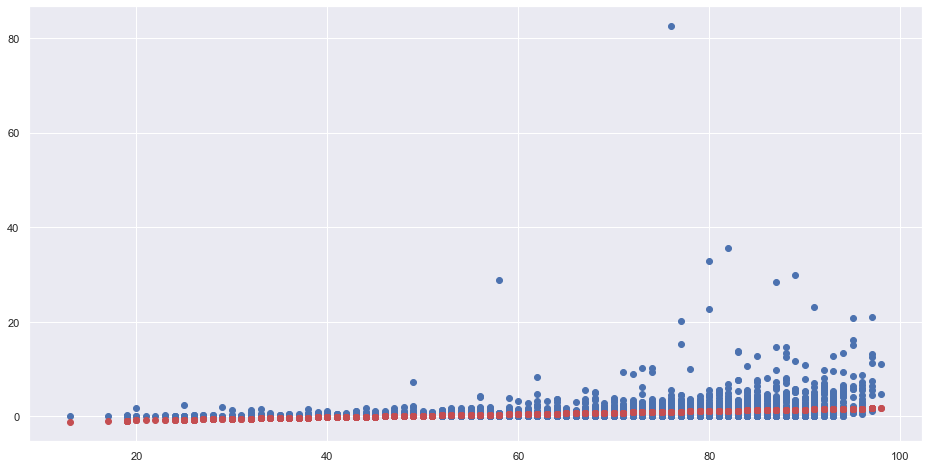

In [150]:

linreg.fit(cs_train, gs_train)
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
gs_train_pred = linreg.predict(cs_train)
gs_test_pred = linreg.predict(cs_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_train, gs_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_train, gs_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_test, gs_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_test, gs_test_pred))
print()


f = plt.figure(figsize=(16, 8))
plt.scatter(cs_train, gs_train)
plt.scatter(cs_train, gs_train_pred, color = "r")
plt.show()

# Predicting Rating by global sales

Train Classification Accuracy: 0.3854879366222542
Test Classification Accuracy: 0.36069114470842334


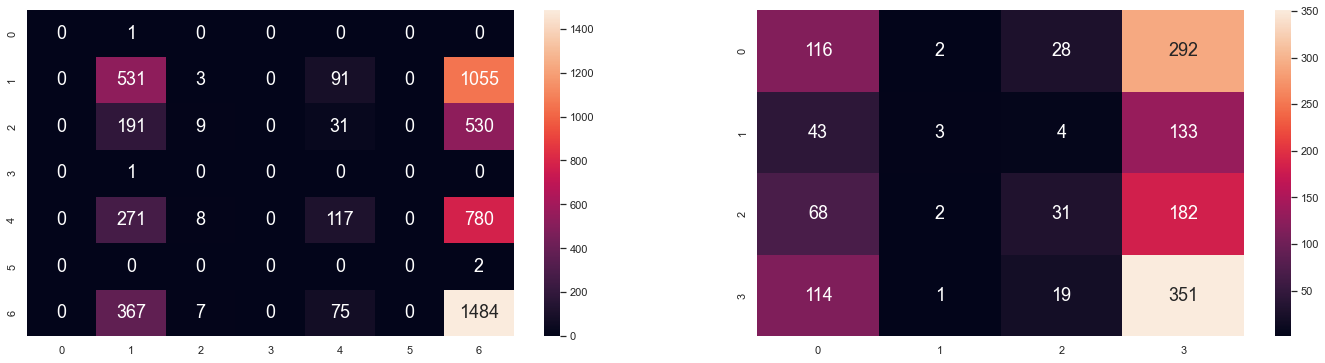

In [151]:
ra_train = pd.DataFrame(train['Rating'])
ra_test = pd.DataFrame(test['Rating'])
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object

dectree2 = DecisionTreeClassifier(max_depth = 8)

# Train the Decision Tree Classifier model

dectree2.fit(gs_train,ra_train)



from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])


import graphviz                          
graphviz.Source(dot_data2)

train_pred2 = dectree2.predict(gs_train)
test_pred2 = dectree2.predict(gs_test)

print("Train Classification Accuracy:",dectree2.score(gs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gs_test,ra_test))
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()




## Predicting Rating by Genre and globalsales

Train Classification Accuracy: 0.5866042491897732
Test Classification Accuracy: 0.5514758819294456


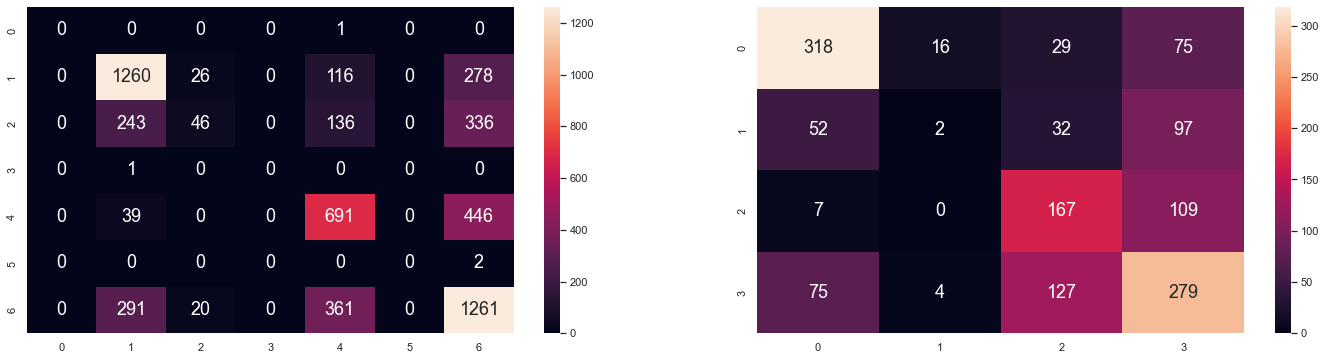

In [152]:


gegs_train = pd.DataFrame(train[['Genre','Global_Sales']])
gegs_test = pd.DataFrame(test[['Genre','Global_Sales']])
type(gegs_train)
gegs_train['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

gegs_test['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

dectree2.fit(gegs_train,ra_train)

dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gegs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])

train_pred2 = dectree2.predict(gegs_train)
test_pred2 = dectree2.predict(gegs_test)
print("Train Classification Accuracy:",dectree2.score(gegs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gegs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()

In [153]:
print("helllo world")

helllo world


In [154]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(videoGamesSelectedCleaned)
categorical_columns = categorical_columns_selector(videoGamesSelectedCleaned)

In [155]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [156]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, videoGamesSelectedCleaned['Genre']),
    ('standard_scaler', numerical_preprocessor, videoGamesSelectedCleaned['Global_Sales'])])

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  0          Sports
2          Racing
3          Sports
6        Platform
7            Misc
           ...   
16667      Action
16677    Fighting
16696      Action
16700     Shooter
16706    Strategy
Name: Genre, Length: 6943, dtype: object),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  0        82.53
2        35.52
3        32.77
6        29.80
7        28.92
         ...  
16667     0.01
16677     0.01
16696     0.01
16700     0.01
16706     0.01
Name: Global_Sales, Length: 6943, dtype: float64)])),
                ('logisticregression', LogisticRegression(max_iter=500))])